In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#mods: 1206paul_, aloddin, balintboss, banties1g, devilleboi, fossabot, gkey, hueqi, ivana_10, ivanonmyown, klimzaa, martin_gales, moki1g, nightbot, ravenbtw, streamelements, substen.

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'Aloddin']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'Banties1g']
#data2 = data[data['user'] == 'devilleboi']
#data2 = data[data['user'] == 'fossabot']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Hueqi']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Ivana_10']
#data2 = data[data['user'] == 'Martin_Gales']

#data2 = data[data['user'] == 'moki1g']
#data2 = data[data['user'] == 'nightbot']
#data2 = data[data['user'] == 'Ravenbtw']
#data2 = data[data['user'] == 'StreamElements']
#data2 = data[data['user'] == 'Substen']

#vips: 1SKELTON, fartnado2020, kloakpojken, kuddo_, nate_001_, ojov, pfftsmh, spinglebob, thebigdogjay, Typhu25, wasabi__ttv.

#data2 = data[data['user'] == 'Typhu25']
#data2 = data[data['user'] == 'fartnado2020']
#data2 = data[data['user'] == 'wasabi__ttv']
#data2 = data[data['user'] == '1SKELTON']
#data2 = data[data['user'] == 'pfftsmh']
#data2 = data[data['user'] == 'spinglebob']


#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']
data2 = data[data['user'] == 'nate_001_']





# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length
2,1,9,126.0,17831.0
1,20,11,121.0,21336.0
3,30,5,75.0,10681.0
4,53,4,99.0,29431.0
0,64,15,366.0,18507.0


In [2]:
data2['user'].max()

'nate_001_'

In [3]:
# Create a DataFrame with all possible stream values (0 to 80)
all_streams = pd.DataFrame({'stream': range(data['stream'].max()+1)})

# Merge the original DataFrame with the all_streams DataFrame
stream_stats = all_streams.merge(stream_stats, on='stream', how='left')

# Fill missing values with 0
stream_stats.fillna(0, inplace=True)


stream_stats.tail(5)


,stream,total_messages,watch_length,stream_length
80,80,0.0,0.0,0.0
81,81,0.0,0.0,0.0
82,82,0.0,0.0,0.0
83,83,0.0,0.0,0.0
84,84,0.0,0.0,0.0


In [4]:
stream_stats.describe()

,stream,total_messages,watch_length,stream_length
count,85.000000,85.000000,85.000000,85.000000
mean,42.000000,0.517647,9.258824,1150.423529
std,24.681302,2.302234,45.331098,4859.270366
min,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000,0.000000
75%,63.000000,0.000000,0.000000,0.000000
max,84.000000,15.000000,366.000000,29431.000000


In [5]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
0,0,0.0,0.0,0.0,0.000,0.000000
1,1,9.0,126.0,17831.0,0.035,4.953056
2,2,0.0,0.0,0.0,0.000,0.000000
3,3,0.0,0.0,0.0,0.000,0.000000
4,4,0.0,0.0,0.0,0.000,0.000000


In [6]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100
stream_stats['persenteg'] = stream_stats['persenteg'].fillna(0)

stream_stats.head(20)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,0.0,0.0,0.0,0.000,0.000000,0.000000
1,1,9.0,126.0,17831.0,0.035,4.953056,0.706635
2,2,0.0,0.0,0.0,0.000,0.000000,0.000000
3,3,0.0,0.0,0.0,0.000,0.000000,0.000000
4,4,0.0,0.0,0.0,0.000,0.000000,0.000000
5,5,0.0,0.0,0.0,0.000,0.000000,0.000000
6,6,0.0,0.0,0.0,0.000,0.000000,0.000000
7,7,0.0,0.0,0.0,0.000,0.000000,0.000000
8,8,0.0,0.0,0.0,0.000,0.000000,0.000000
9,9,0.0,0.0,0.0,0.000,0.000000,0.000000


In [7]:
stream_stats['persenteg'].describe()

count    85.000000
mean      0.050470
std       0.246926
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.977630
Name: persenteg, dtype: float64

In [8]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,0.0,0.0,0.0,0.0,0.0,0.0
60,60,0.0,0.0,0.0,0.0,0.0,0.0
59,59,0.0,0.0,0.0,0.0,0.0,0.0
58,58,0.0,0.0,0.0,0.0,0.0,0.0
57,57,0.0,0.0,0.0,0.0,0.0,0.0
56,56,0.0,0.0,0.0,0.0,0.0,0.0
55,55,0.0,0.0,0.0,0.0,0.0,0.0
54,54,0.0,0.0,0.0,0.0,0.0,0.0
52,52,0.0,0.0,0.0,0.0,0.0,0.0
51,51,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
stream_stats['watch_length_in_hour'].sum() /24

0.009108796296296295

In [10]:

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,0.0,0.0,0.0,0.0,0.0,0.0
60,60,0.0,0.0,0.0,0.0,0.0,0.0
59,59,0.0,0.0,0.0,0.0,0.0,0.0
58,58,0.0,0.0,0.0,0.0,0.0,0.0
57,57,0.0,0.0,0.0,0.0,0.0,0.0
56,56,0.0,0.0,0.0,0.0,0.0,0.0
55,55,0.0,0.0,0.0,0.0,0.0,0.0
54,54,0.0,0.0,0.0,0.0,0.0,0.0
52,52,0.0,0.0,0.0,0.0,0.0,0.0
51,51,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
24,24,0.0,0.0,0.0,0.000000,0.000000,0.000000
23,23,0.0,0.0,0.0,0.000000,0.000000,0.000000
38,38,0.0,0.0,0.0,0.000000,0.000000,0.000000
22,22,0.0,0.0,0.0,0.000000,0.000000,0.000000
28,28,0.0,0.0,0.0,0.000000,0.000000,0.000000
53,53,4.0,99.0,29431.0,0.027500,8.175278,0.336380
20,20,11.0,121.0,21336.0,0.033611,5.926667,0.567117
30,30,5.0,75.0,10681.0,0.020833,2.966944,0.702181
1,1,9.0,126.0,17831.0,0.035000,4.953056,0.706635
64,64,15.0,366.0,18507.0,0.101667,5.140833,1.977630


In [12]:
stream_stats = stream_stats.sort_values(by='stream')
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
75,75,0.0,0.0,0.0,0.0,0.0,0.0
76,76,0.0,0.0,0.0,0.0,0.0,0.0
77,77,0.0,0.0,0.0,0.0,0.0,0.0
78,78,0.0,0.0,0.0,0.0,0.0,0.0
79,79,0.0,0.0,0.0,0.0,0.0,0.0
80,80,0.0,0.0,0.0,0.0,0.0,0.0
81,81,0.0,0.0,0.0,0.0,0.0,0.0
82,82,0.0,0.0,0.0,0.0,0.0,0.0
83,83,0.0,0.0,0.0,0.0,0.0,0.0
84,84,0.0,0.0,0.0,0.0,0.0,0.0


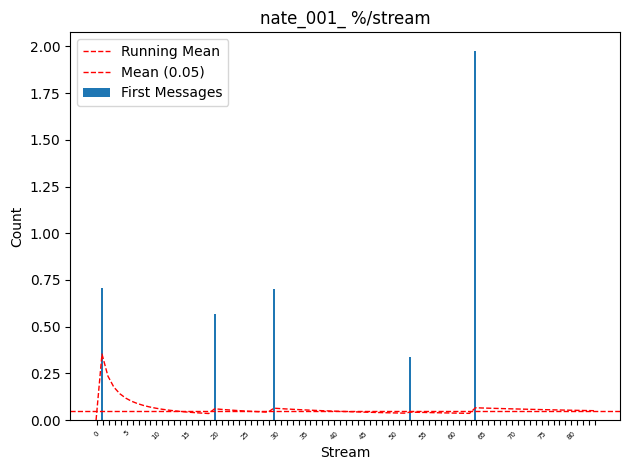

In [13]:
# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title(data2['user'].max() + ' %/stream', fontsize=12)

# Set x-ticks and x-tick labels
ax.set_xticks([i + bar_width / 2 for i in index])
xtick_labels = ['' if i % 5 != 0 else stream_stats['stream'][i] for i in index]
ax.set_xticklabels(xtick_labels, fontsize=5)  # Adjust x-tick labels font size

# Add legend
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()